In [568]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [569]:
car_data = pd.read_csv('test_data.csv')
car_data.head(3)

,Make,Model,Year,Safety Rating,Price,Kms,Highway Fuel Efficiency (L/100km),City Fuel Efficiency (L/100km),Tire Size,Length (mm),Width (mm),Height (mm),Front Legroom (mm),Rear Legroom (mm),Wheelbase,Cargo Volume (seats up),Horsepower,Engine Size
0,Toyota,RAV4 LE,2013,4,"$19,998.00",35944,6.4,8.7,P225/65R17,4569,1844,1661,1084,945,2659,1087,176.0,2.5L
1,Toyota,Matrix,2013,4,"$14,995.00",44160,6.4,8.2,205/55HR16,4366,1765,1549,1057,919,2601,561,132.0,1.8L
2,Nissan,Rogue,2013,4,"$16,000.00",40000,7.0,9.0,P215/70R16,4655,1800,1684,1080,897,2690,818,170.0,2.5L


In [570]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
Make                                 10 non-null object
Model                                10 non-null object
Year                                 10 non-null int64
Safety Rating                        10 non-null int64
Price                                10 non-null object
Kms                                  10 non-null int64
Highway Fuel Efficiency (L/100km)    10 non-null float64
City Fuel Efficiency (L/100km)       10 non-null float64
Tire Size                            10 non-null object
Length (mm)                          10 non-null int64
Width (mm)                           10 non-null int64
Height (mm)                          10 non-null int64
Front Legroom (mm)                   10 non-null int64
Rear Legroom (mm)                    10 non-null int64
Wheelbase                            10 non-null int64
Cargo Volume (seats up)              10 non-null int64
Horsepower

In [571]:
car_data.corr()

,Year,Safety Rating,Kms,Highway Fuel Efficiency (L/100km),City Fuel Efficiency (L/100km),Length (mm),Width (mm),Height (mm),Front Legroom (mm),Rear Legroom (mm),Wheelbase,Cargo Volume (seats up),Horsepower
Year,1.000000,0.250000,-0.303943,0.474046,0.523523,-0.658033,0.038916,-0.121015,-0.243375,0.208980,-0.293520,-0.448564,0.264695
Safety Rating,0.250000,1.000000,-0.186127,-0.270883,-0.247129,-0.319998,-0.354821,-0.567043,0.124902,-0.208469,-0.263424,-0.189129,0.093952
Kms,-0.303943,-0.186127,1.000000,-0.563098,-0.424716,0.561637,0.348167,0.226200,-0.233021,0.181091,0.620675,0.243820,-0.434273
Highway Fuel Efficiency (L/100km),0.474046,-0.270883,-0.563098,1.000000,0.824617,-0.497653,0.137887,0.467108,-0.513389,0.541707,-0.236218,0.007821,0.423575
City Fuel Efficiency (L/100km),0.523523,-0.247129,-0.424716,0.824617,1.000000,-0.253595,0.450283,0.392155,-0.523686,0.443518,0.026268,-0.031167,0.654979
Length (mm),-0.658033,-0.319998,0.561637,-0.497653,-0.253595,1.000000,0.426343,0.359413,0.173165,-0.184312,0.746058,0.484258,0.114652
Width (mm),0.038916,-0.354821,0.348167,0.137887,0.450283,0.426343,1.000000,0.518875,-0.404411,0.483453,0.647530,0.285327,0.701390
Height (mm),-0.121015,-0.567043,0.226200,0.467108,0.392155,0.359413,0.518875,1.000000,-0.559181,0.716785,0.448276,0.749182,0.424298
Front Legroom (mm),-0.243375,0.124902,-0.233021,-0.513389,-0.523686,0.173165,-0.404411,-0.559181,1.000000,-0.863511,-0.354308,-0.322950,-0.060148
Rear Legroom (mm),0.208980,-0.208469,0.181091,0.541707,0.443518,-0.184312,0.483453,0.716785,-0.863511,1.000000,0.189259,0.527174,0.237979


<br><br>
![](corr.png)

<br>

#### Correlation matrix 

##### I have found and marked few cardinality in colors to show how I am going to interpret these data in later sections.

* From our problem parameters it shows sue has three family members and a dog and this will the family's primary mode of transportation, which means we need more space in the Front, Rear Legroom and Cargo Space should be little bigger then the most average car. 

* It's quite clear from out dataset's correlation <span style="color:#3192F4"> **Length:-0.184312, Width:-0.404411, Height:-0.55918** </span> is the key factors to define more Legroom in the Front and Rear. 
* On the other hand, <span style="color:#D00362"> **Cargo Volume (seats up): 0.749182** </span> has a relation with `Length` of the car.
* Highway Fuel Efficiency (L/100km) and city Fuel Efficiency (L/100km)  <span style="color:#FCF812"> **Fuel Efficiency: 0.824617** </span> is correlated.

* Wheelbase is mostly dependent on Length and sequentialy, for Width and Height i.e., <span style="color:green"> **Wheelbase length relation: 0.740658** </span>. However, more the wheelbase the kilomiter's units also gets effected. <span style="color:#5A0FA0"> **Kms: 0.620675** </span> 

* Lastly, Horsepower depands on the car width, it's logical that engine needs more power to drive a bigger body/structure of a car
<span style="color:#D82D0F"> **Horsepower: 0.701390** </span>.


In [572]:
car_data.replace('', np.nan, inplace=True)

In [668]:
car_data.head()

,Make,Model,Year,Safety Rating,Price,Kms,Highway Fuel Efficiency (L/100km),City Fuel Efficiency (L/100km),Tire Size,Length (mm),...,Cargo Volume (seats up),Horsepower,Engine Size,Engine Size NM,Year Drove,Drove/Annual,Tire diameter,HWY Fuel Eff,City Fuel Eff,Cargo
0,Toyota,RAV4 LE,2013,4,"$19,998.00",35944,6.4,8.7,P225/65R17,4569,...,1087,176.0,2.5L,2.5,6,5990.67,17,6.4,8.7,1087
1,Toyota,Matrix,2013,4,"$14,995.00",44160,6.4,8.2,205/55HR16,4366,...,561,132.0,1.8L,1.8,6,7360.00,16,6.4,8.2,561
2,Nissan,Rogue,2013,4,"$16,000.00",40000,7.0,9.0,P215/70R16,4655,...,818,170.0,2.5L,2.5,6,6666.67,16,7.0,9.0,818
3,Ford,Edge SEL,2013,4,"$19,995.00",57891,6.6,9.9,245/60HR18,4678,...,912,NaN,3.5L,3.5,6,9648.50,18,6.6,9.9,912
4,Kia,Rondo,2014,5,"$12,884.00",45536,6.2,9.2,P205/55HR16,4525,...,912,164.0,2.0L,2.0,5,9107.20,16,6.2,9.2,912


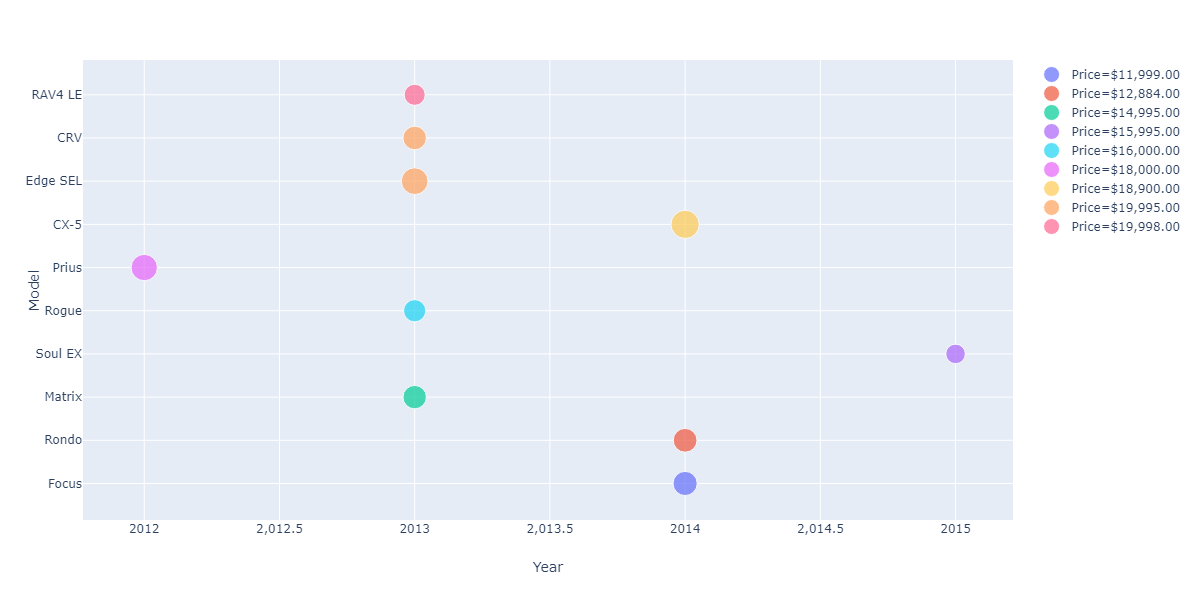

In [574]:
px.scatter(car_data,x="Year",y="Model",color="Price", size="Kms")

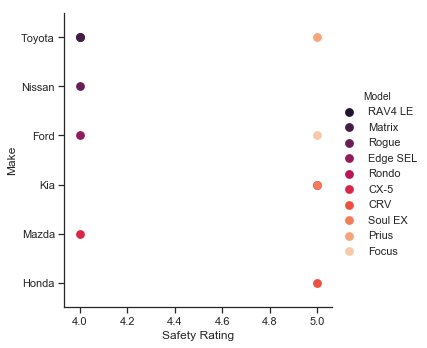

In [667]:
sns.catplot('Safety Rating','Make',hue='Model',data=car_data,kind="point",palette='rocket')

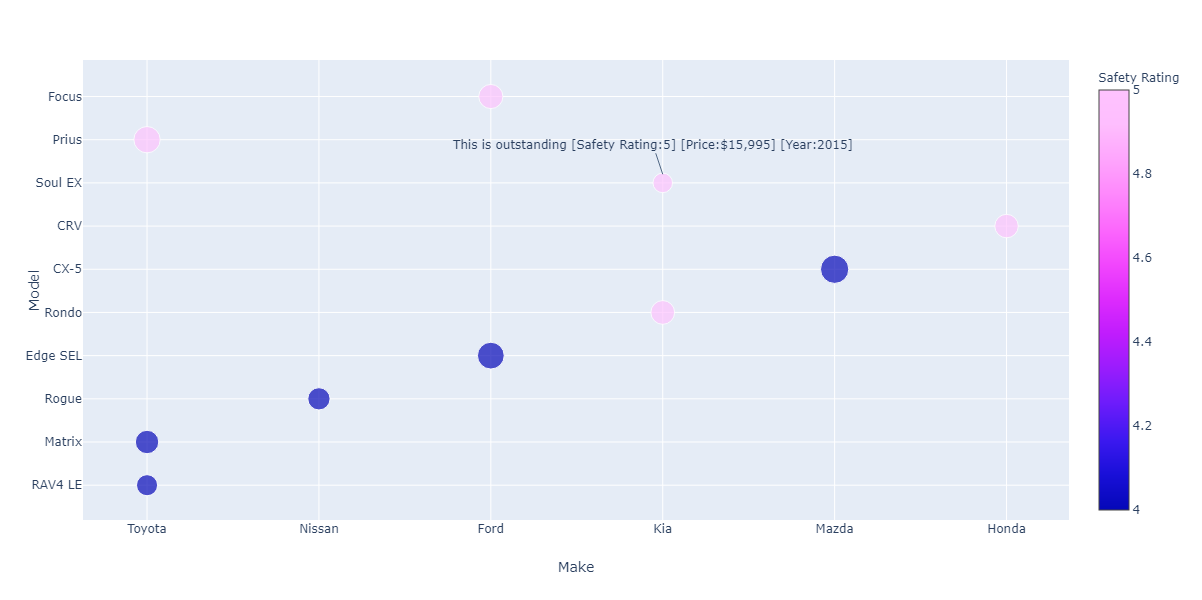

In [575]:
fig = px.scatter(car_data,x="Make",y="Model",color="Safety Rating", size="Kms")

fig.update(layout=dict(legend=dict(orientation='h', y =1.1, x=0.5), annotations=[go.layout.Annotation(text="This is outstanding [Safety Rating:5] [Price:$15,995] [Year:2015]", x=3,y=7.2)]))

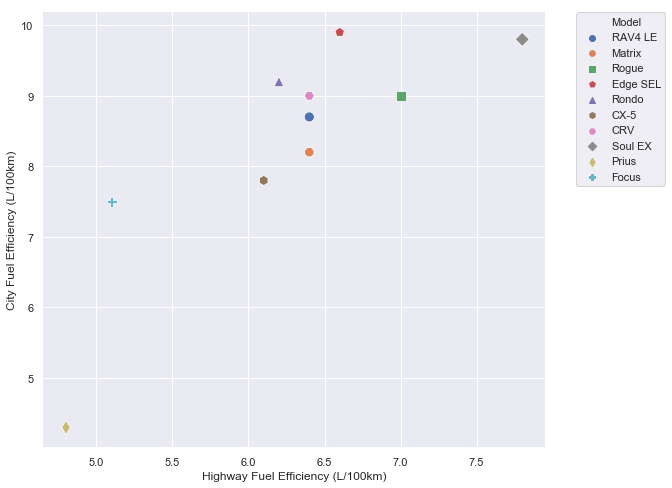

In [576]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(9, 8))
sns.despine(fig, left=True, bottom=True)
filled_markers = ('o', '8', 's', 'p', '^', 'h', 'H', 'D', 'd', 'P') 

car_sf_km = sns.scatterplot(x="Highway Fuel Efficiency (L/100km)", y="City Fuel Efficiency (L/100km)",hue="Model",
                          style="Model", markers=filled_markers, s=100, data=car_data, ax=ax)
car_sf_km.legend(loc='right', bbox_to_anchor=(1.25, 0.8), ncol=1)
plt.savefig('fuel_effi.png')
plt.show()



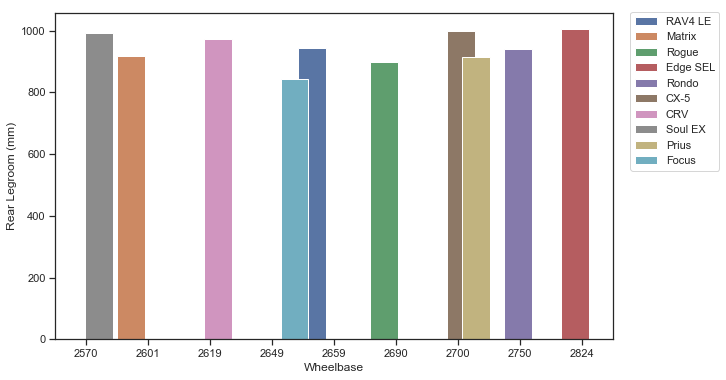

In [577]:
sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(10, 6))
car = sns.barplot(x="Wheelbase",y="Rear Legroom (mm)",hue= "Model",ax=ax, data = car_data)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        patch.set_width(new_value)

        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .45)
car.legend(loc='right', bbox_to_anchor=(1.20, .76), ncol=1)
plt.savefig('rear.png')
plt.show()

In [653]:
end = datetime.now()
car_data['Year Drove'] = ((end.year)-car_data['Year'])
car_data.head()

,Make,Model,Year,Safety Rating,Price,Kms,Highway Fuel Efficiency (L/100km),City Fuel Efficiency (L/100km),Tire Size,Length (mm),...,Front Legroom (mm),Rear Legroom (mm),Wheelbase,Cargo Volume (seats up),Horsepower,Engine Size,Engine Size NM,Year Drove,Drove/Annual,Tire diameter
0,Toyota,RAV4 LE,2013,4,"$19,998.00",35944,6.4,8.7,P225/65R17,4569,...,1084,945,2659,1087,176.0,2.5L,2.5,6,5990.67,17
1,Toyota,Matrix,2013,4,"$14,995.00",44160,6.4,8.2,205/55HR16,4366,...,1057,919,2601,561,132.0,1.8L,1.8,6,7360.00,16
2,Nissan,Rogue,2013,4,"$16,000.00",40000,7.0,9.0,P215/70R16,4655,...,1080,897,2690,818,170.0,2.5L,2.5,6,6666.67,16
3,Ford,Edge SEL,2013,4,"$19,995.00",57891,6.6,9.9,245/60HR18,4678,...,1016,1006,2824,912,NaN,3.5L,3.5,6,9648.50,18
4,Kia,Rondo,2014,5,"$12,884.00",45536,6.2,9.2,P205/55HR16,4525,...,1034,940,2750,912,164.0,2.0L,2.0,5,9107.20,16


In [652]:
car_data['Drove/Annual'] = car_data['Kms']/car_data['Year Drove']
car_data['Drove/Annual'] = car_data['Drove/Annual'].round(2)
car_data.head()

,Make,Model,Year,Safety Rating,Price,Kms,Highway Fuel Efficiency (L/100km),City Fuel Efficiency (L/100km),Tire Size,Length (mm),...,Front Legroom (mm),Rear Legroom (mm),Wheelbase,Cargo Volume (seats up),Horsepower,Engine Size,Engine Size NM,Year Drove,Drove/Annual,Tire diameter
0,Toyota,RAV4 LE,2013,4,"$19,998.00",35944,6.4,8.7,P225/65R17,4569,...,1084,945,2659,1087,176.0,2.5L,2.5,6,5990.67,17
1,Toyota,Matrix,2013,4,"$14,995.00",44160,6.4,8.2,205/55HR16,4366,...,1057,919,2601,561,132.0,1.8L,1.8,6,7360.00,16
2,Nissan,Rogue,2013,4,"$16,000.00",40000,7.0,9.0,P215/70R16,4655,...,1080,897,2690,818,170.0,2.5L,2.5,6,6666.67,16
3,Ford,Edge SEL,2013,4,"$19,995.00",57891,6.6,9.9,245/60HR18,4678,...,1016,1006,2824,912,NaN,3.5L,3.5,6,9648.50,18
4,Kia,Rondo,2014,5,"$12,884.00",45536,6.2,9.2,P205/55HR16,4525,...,1034,940,2750,912,164.0,2.0L,2.0,5,9107.20,16


In [656]:
car_data['Tire diameter'] = car_data["Tire Size"].str[-2:]
car_data.head()

,Make,Model,Year,Safety Rating,Price,Kms,Highway Fuel Efficiency (L/100km),City Fuel Efficiency (L/100km),Tire Size,Length (mm),...,Front Legroom (mm),Rear Legroom (mm),Wheelbase,Cargo Volume (seats up),Horsepower,Engine Size,Engine Size NM,Year Drove,Drove/Annual,Tire diameter
0,Toyota,RAV4 LE,2013,4,"$19,998.00",35944,6.4,8.7,P225/65R17,4569,...,1084,945,2659,1087,176.0,2.5L,2.5,6,5990.67,17
1,Toyota,Matrix,2013,4,"$14,995.00",44160,6.4,8.2,205/55HR16,4366,...,1057,919,2601,561,132.0,1.8L,1.8,6,7360.00,16
2,Nissan,Rogue,2013,4,"$16,000.00",40000,7.0,9.0,P215/70R16,4655,...,1080,897,2690,818,170.0,2.5L,2.5,6,6666.67,16
3,Ford,Edge SEL,2013,4,"$19,995.00",57891,6.6,9.9,245/60HR18,4678,...,1016,1006,2824,912,NaN,3.5L,3.5,6,9648.50,18
4,Kia,Rondo,2014,5,"$12,884.00",45536,6.2,9.2,P205/55HR16,4525,...,1034,940,2750,912,164.0,2.0L,2.0,5,9107.20,16


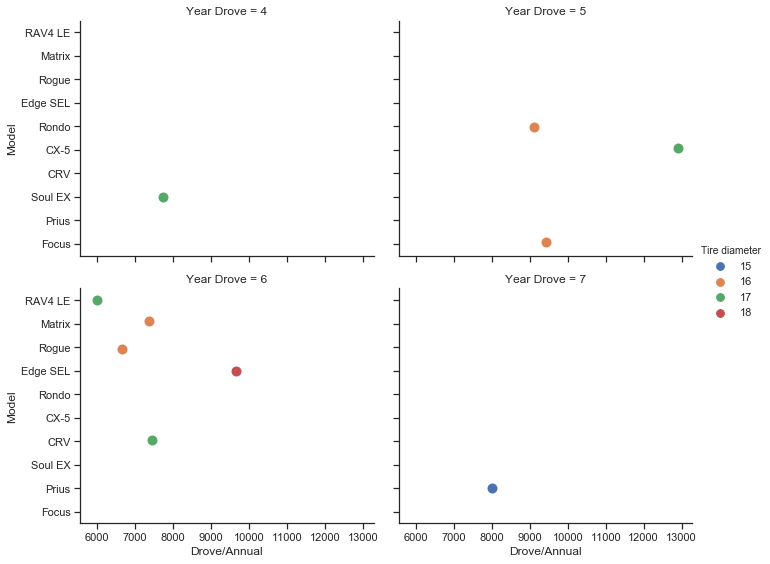

In [693]:
sns.set(style="ticks")
sns.catplot(x="Drove/Annual", y="Model",  
            hue="Tire diameter", col="Year Drove", data=car_data, s=10,
            col_wrap=2,height=4
            ,aspect=1.24)  

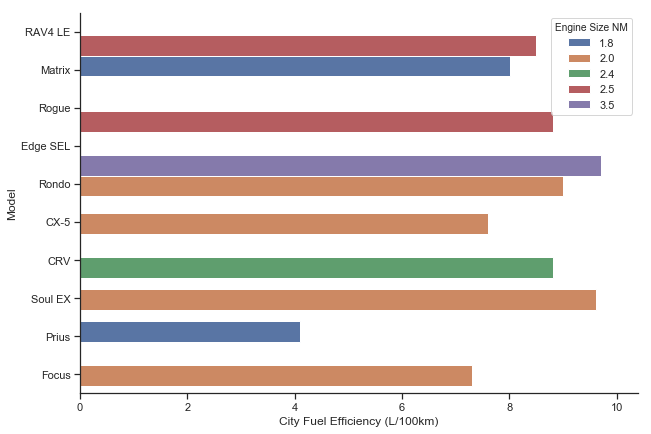

In [581]:
car_data['Engine Size NM'] = car_data['Engine Size'].str.replace('L','')
car_data['Engine Size NM'] = pd.to_numeric(car_data['Engine Size NM'])

fig, ax = plt.subplots(figsize=(10, 7))
sns.despine(fig, left=False, bottom=False)
car_engsize = sns.barplot(x="City Fuel Efficiency (L/100km)",y="Model",hue= "Engine Size NM",ax=ax, data = car_data)
def change_height(ax, new_value) :
    for patch in ax.patches :
        current_height = patch.get_height()
        diff = current_height - new_value

        patch.set_height(new_value)

        patch.set_x(patch.get_x() + diff * .5)

change_height(ax, .55)
plt.savefig('engine_size.png')
plt.show()

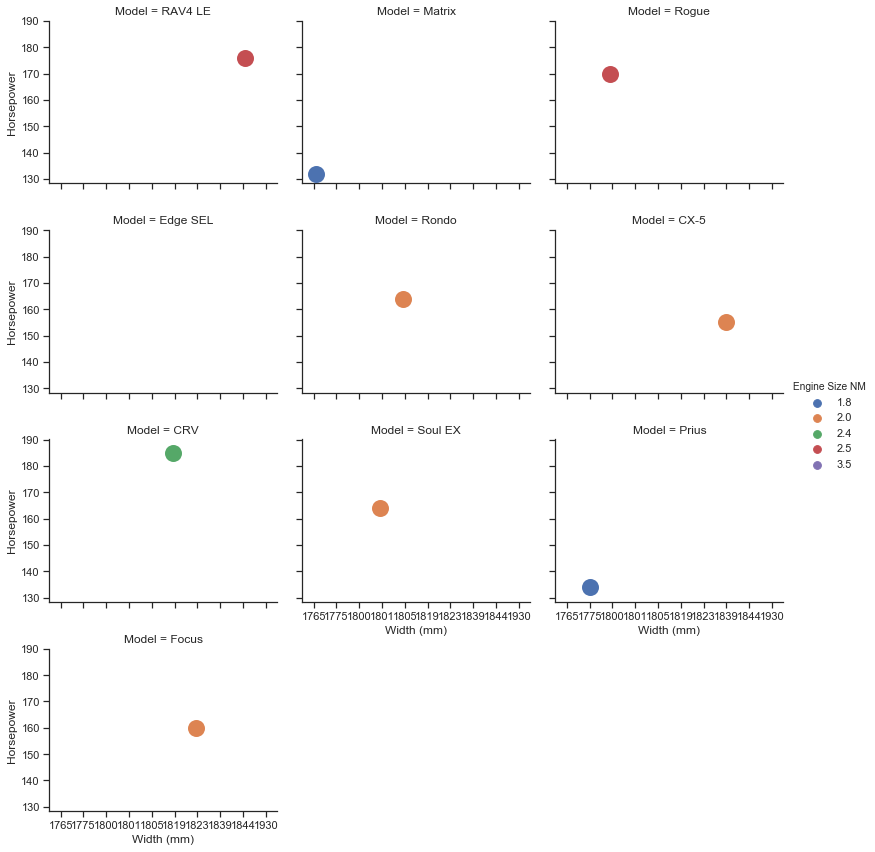

In [601]:
sns.set(style="ticks")
sns.catplot(x="Width (mm)", y="Horsepower", 
            hue="Engine Size NM", col="Model", 
            data=car_data, s=17,
            col_wrap=3,height=3,aspect=1.24)  


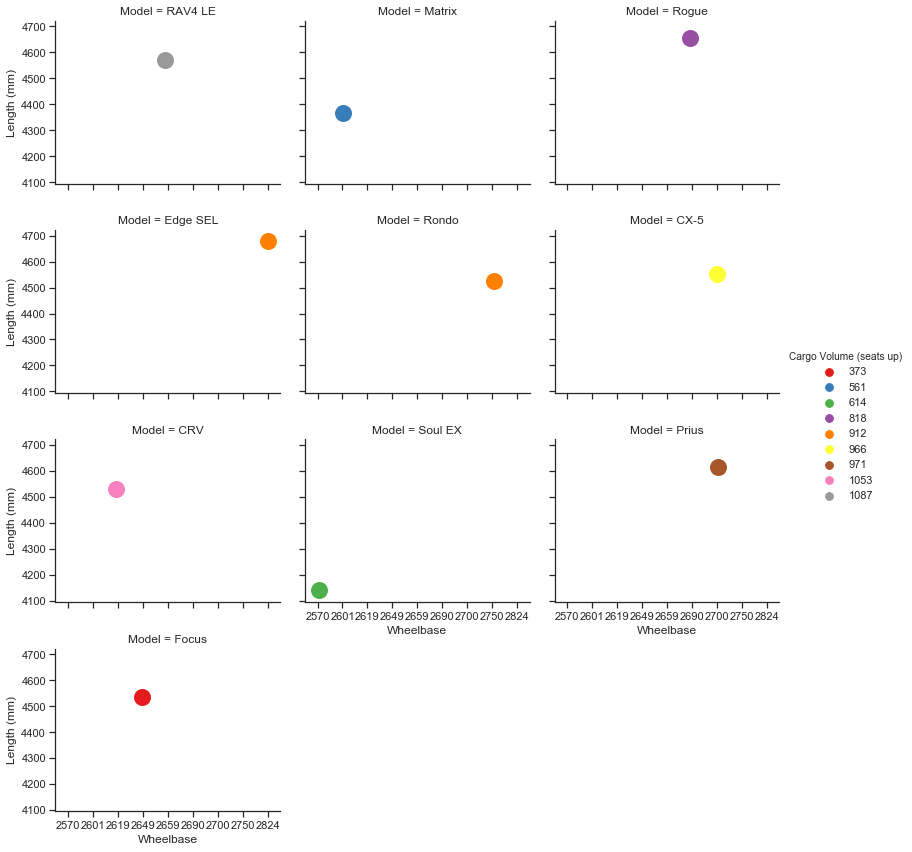

In [417]:
sns.set(style="ticks")
sns.catplot(x="Wheelbase", y="Length (mm)",data=car_data, hue="Cargo Volume (seats up)",col="Model", s=17,
            col_wrap=3,height=3,aspect=1.24,palette='Set1')
plt.savefig('col_model.png')
plt.show()

In [657]:
car_2data = (car_data.loc[car_data['Model'].isin(['CRV','RAV4 LE', 'Edge SEL','CX-5'])])
car_2data.head()

,Make,Model,Year,Safety Rating,Price,Kms,Highway Fuel Efficiency (L/100km),City Fuel Efficiency (L/100km),Tire Size,Length (mm),...,Front Legroom (mm),Rear Legroom (mm),Wheelbase,Cargo Volume (seats up),Horsepower,Engine Size,Engine Size NM,Year Drove,Drove/Annual,Tire diameter
0,Toyota,RAV4 LE,2013,4,"$19,998.00",35944,6.4,8.7,P225/65R17,4569,...,1084,945,2659,1087,176.0,2.5L,2.5,6,5990.67,17
3,Ford,Edge SEL,2013,4,"$19,995.00",57891,6.6,9.9,245/60HR18,4678,...,1016,1006,2824,912,NaN,3.5L,3.5,6,9648.50,18
5,Mazda,CX-5,2014,4,"$18,900.00",64546,6.1,7.8,P225/65R17,4554,...,1041,998,2700,966,155.0,2.0L,2.0,5,12909.20,17
6,Honda,CRV,2013,5,"$19,995.00",44665,6.4,9.0,225/65R17,4529,...,1049,973,2619,1053,185.0,2.4L,2.4,6,7444.17,17


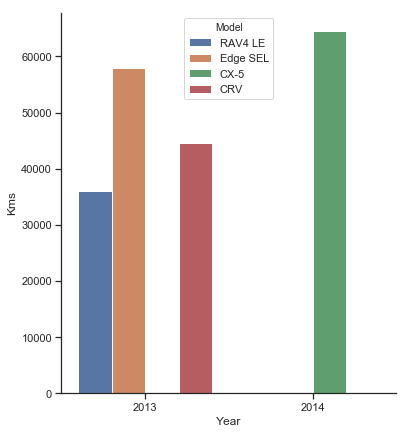

In [681]:
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(6, 7))
sns.despine(fig, left=False, bottom=False)
a = sns.barplot(x="Year", y="Kms",hue="Model", data=car_2data, ax=ax)


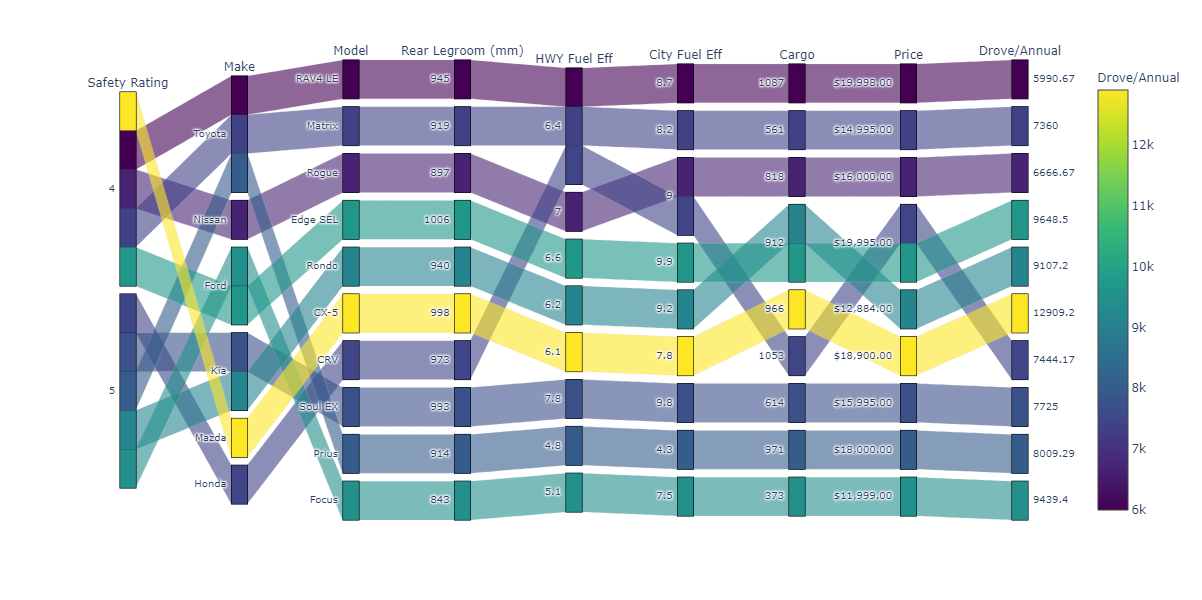

In [663]:
car_data['HWY Fuel Eff'] = car_data['Highway Fuel Efficiency (L/100km)']
car_data['City Fuel Eff'] = car_data['City Fuel Efficiency (L/100km)']
car_data['Cargo'] = car_data['Cargo Volume (seats up)']
car_cus = car_data[['Safety Rating','Make','Model','Rear Legroom (mm)','HWY Fuel Eff','City Fuel Eff','Cargo','Price','Drove/Annual']]

px.parallel_categories(car_cus, color="Drove/Annual", color_continuous_scale=px.colors.sequential.Viridis)